In [ ]:
import tensorflow as tf
import numpy as np 

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt

In [ ]:
# Load the dataset
data = open('./trilussa.txt').read()

# Lowercase and split the text
corpus = data.lower().split("\n")

# Preview the result
print(corpus)

In [ ]:
# Initialize the Tokenizer class
tokenizer = Tokenizer()

# Generate the word index dictionary
tokenizer.fit_on_texts(corpus)

# Define the total words. You add 1 for the index `0` which is just the padding token.
total_words = len(tokenizer.word_index) + 1

print(f'word index dictionary: {tokenizer.word_index}')
print(f'total words: {total_words}')

In [ ]:
# Initialize the sequences list
input_sequences = []

# Loop over every line
for line in corpus:

	# Tokenize the current line
	token_list = tokenizer.texts_to_sequences([line])[0]

	# Loop over the line several times to generate the subphrases
	for i in range(1, len(token_list)):
		
		# Generate the subphrase
		n_gram_sequence = token_list[:i+1]

		# Append the subphrase to the sequences list
		input_sequences.append(n_gram_sequence)

# Get the length of the longest line
max_sequence_len = max([len(x) for x in input_sequences])

# Pad all sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
# Get sample sentence
sentence = corpus[0].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# Look up the indices of each word and append to the list
for word in sentence: 
  token_list.append(tokenizer.word_index[word])

# Print the token list
print(token_list)

In [ ]:
# Pick element
elem_number = 5

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

In [ ]:
# Pick element
elem_number = 4

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

In [ ]:
# Hyperparameters
embedding_dim = 100
lstm_units = 150
learning_rate = 0.01

# Build the model
model = Sequential([
          Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),
          Bidirectional(LSTM(lstm_units)),
          Dense(total_words, activation='softmax')
])

# Use categorical crossentropy because this is a multi-class problem
model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=['accuracy']
    )

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 28, 100)           65400     
                                                                 
 bidirectional_1 (Bidirectio  (None, 300)              301200    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 654)               196854    
                                                                 
Total params: 563,454
Trainable params: 563,454
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 100

# Train the model
history = model.fit(xs, ys, epochs=epochs)

Epoch 1/100
35/35 [==============================] - 4s 22ms/step - loss: 6.5093 - accuracy: 0.0181
Epoch 2/100
35/35 [==============================] - 1s 23ms/step - loss: 6.0272 - accuracy: 0.0262
Epoch 3/100
35/35 [==============================] - 1s 23ms/step - loss: 5.4554 - accuracy: 0.0570
Epoch 4/100
35/35 [==============================] - 1s 23ms/step - loss: 4.3522 - accuracy: 0.1637
Epoch 5/100
35/35 [==============================] - 1s 23ms/step - loss: 2.9789 - accuracy: 0.3300
Epoch 6/100
35/35 [==============================] - 1s 23ms/step - loss: 1.6901 - accuracy: 0.6013
Epoch 7/100
35/35 [==============================] - 1s 23ms/step - loss: 0.8987 - accuracy: 0.7694
Epoch 8/100
35/35 [==============================] - 1s 23ms/step - loss: 0.5018 - accuracy: 0.8879
Epoch 9/100
35/35 [==============================] - 1s 23ms/step - loss: 0.3267 - accuracy: 0.9177
Epoch 10/100
35/35 [==============================] - 1s 23ms/step - loss: 0.2812 - accuracy: 0.9250

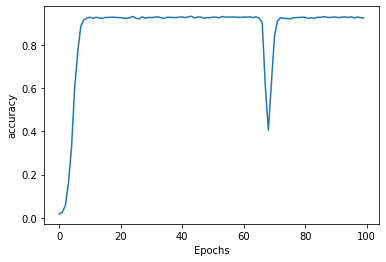

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

In [ ]:
# Define seed text
seed_text = "caro amico mio"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to a token sequence
	token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	
	# Feed to the model and get the probabilities for each index
	probabilities = model.predict(token_list)

	# Get the index with the highest probability
	predicted = np.argmax(probabilities, axis=-1)[0]

	# Ignore if index is 0 because that is just the padding.
	if predicted != 0:
		
		# Look up the word associated with the index. 
		output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
		seed_text += " " + output_word

# Print the result	
print(seed_text)

caro amico mio intrigato quanto ha combattuto der cervello che co quell’aria bonacciona e rassicurante rassicurante in mezzo ar fango ar fango fango fango posto rimasto scemo solamente solamente vene vene semo ar tetto ma per veder raddoppiato vene vene in cima ar tetto indove vene me vene ar tetto indove saputo 'ste vene vene ar tetto indove impettito a panza avanti in priggione ar tetto indove vanno 'ste finestrelle vene in vene ar tetto indove vene 'ste finestrelle campanelle vene ar tetto vene un po' la combatte e je dico addio vene che ce ritroveremo vene fatto e se la prese nun


In [ ]:
# Define seed text
seed_text = "Veronica ha un lavoro"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to a token sequence
  token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	
	# Feed to the model and get the probabilities for each index
  probabilities = model.predict(token_list)

  # Pick a random number from [1,2,3]
  choice = np.random.choice([1,2,3])
	
  # Sort the probabilities in ascending order 
  # and get the random choice from the end of the array
  predicted = np.argsort(probabilities)[0][-choice]

	# Ignore if index is 0 because that is just the padding.
  if predicted != 0:
		
		# Look up the word associated with the index. 
	  output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
	  seed_text += " " + output_word

# Print the result	
print(seed_text)

Veronica ha un lavoro se visione visione affissato in campagna sveji camaleonte e da quanno che devo dà ar nà nà monaca nà fraschetta resti a chi li m'insognavo inventato vene addio lavoranno priggione un ciuccio arosto je vene ciuccio e je che ce sò c'è er pur'io pur'io che se mette lavoranno quarche devo fa sempre e che che vene dè quasi che d'idea se vene e vene ar m’ha arsura ma è stato pena è a sera che ordino servizio de va dio lo scopo vene lavoro de diggiuno vene come mano e j'arisponne rimasto scemo sull’umana ar tavolino ar tetto indove
